In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil  
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

sns.set_style("whitegrid")

In [ ]:
base = pd.read_csv("Movies_new.csv")

# Understanding the dataset

In [ ]:
base.dtypes

Describe function show that the Budget and Revenue columns has 0 as a min values, however, the info() function showed that there isnt any NaN value

In [ ]:
base.describe()
base.info()
base.count()
base.isnull().sum()

This function replace all 0 value to NaN and then it is possible to fill this values with the median of the specific column

In [ ]:
replace = base.replace(0, np.nan, inplace=True)

In [ ]:
budget_median = base.Budget.median()
revenue_median = base.Revenue.median()

In [ ]:
base["Budget"].fillna(budget_median, inplace = True)
base["Revenue"].fillna(revenue_median, inplace = True)

It's possible to save another csv with all columns complete

In [ ]:
base.to_csv("Movies_median.csv", index=False)

# Graph Analysis

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize = (12,6), sharey=True)
fig.suptitle("Comparison between User Rating and Movie Database Average Ratings", fontsize=16)
plt.subplots_adjust(wspace=0, hspace=0)
plt.ylim(1,5)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.despine(left= True)



user_boxplot = sns.boxplot(y = base["Rating"], 
                            color="lightskyblue", 
                            showmeans=True, 
                            meanprops= {"marker":"o",
                                        "markerfacecolor":"white", 
                                        "markeredgecolor":"black", 
                                        "markersize":"7"},
                            medianprops = {"color":"orange", 
                                           "linestyle":"--"}, 
                            ax=axs[0])


database_boxplot = sns.boxplot(y = base["Vote Average"], 
                           color="violet", 
                           showmeans=True,
                           meanprops= {"marker":"o",
                                       "markerfacecolor":"white", 
                                       "markeredgecolor":"black", 
                                       "markersize":"7"},
                           medianprops = {"color":"springgreen", 
                                          "linestyle":"--"},
                           ax=axs[1]).set(ylabel=None)

#plt.savefig("Boxplot_ratings")

# Transform the genres in a Series of genres

In [ ]:
df_genres_id= pd.Series(base["Genres"].values, index = base["ID"], name = "Genres")
split_genres = df_genres_id.str.split("|", expand = False)
genres_explode = split_genres.explode()


In [ ]:
genres_explode.unique()

In [ ]:
genres_count = genres_explode.value_counts()

# WordCloud dos generos

In [ ]:
all_genres = " ".join(s for s in genres_explode).strip()

all_genres

(-0.5, 1599.5, 799.5, -0.5)

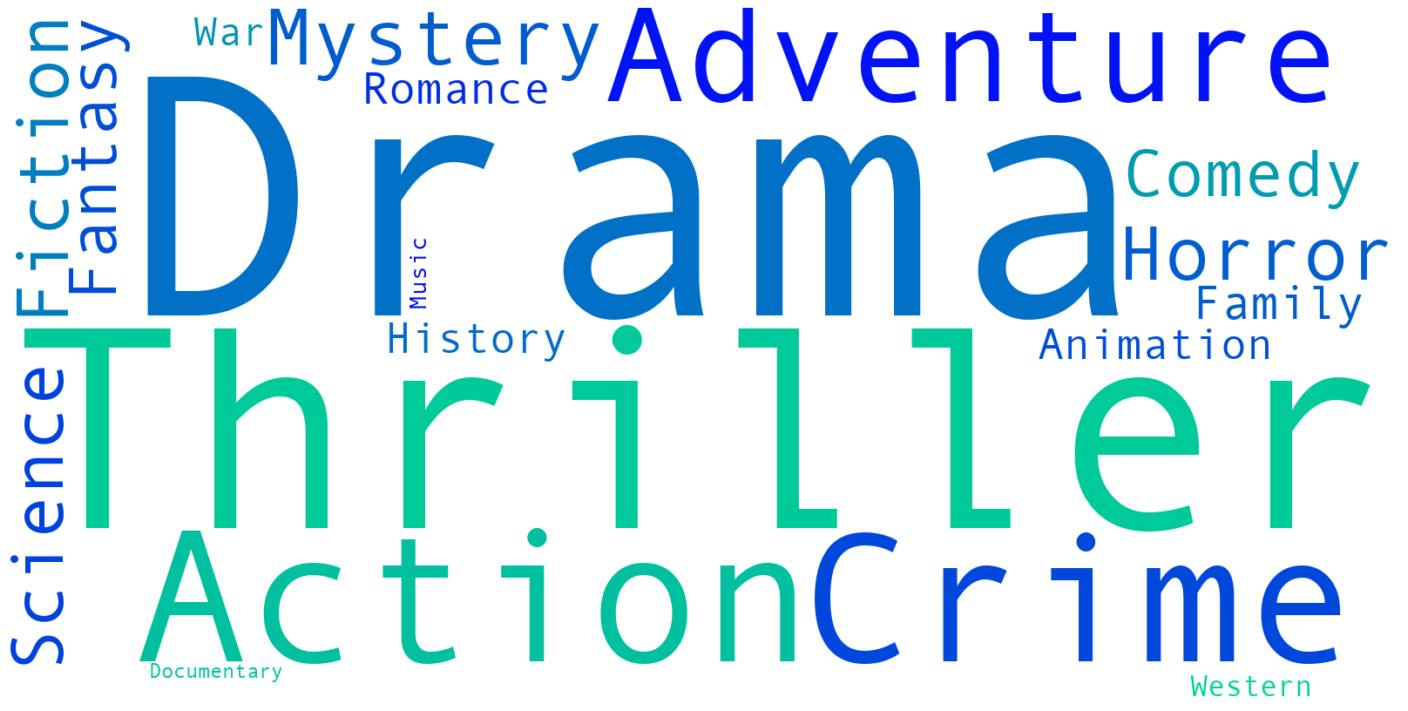

In [155]:
all_genres = " ".join(s for s in genres_explode)


wordcloud = WordCloud(background_color="white",
                      font_path='Andale Mono',
                      width=1600, height=800,
                      collocations=False,
                      colormap = "winter").generate(all_genres)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")

In [ ]:
wordcloud.words_

In [ ]:
palette = sns.color_palette("PiYG_r", 18)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(10,6)})


barplot = sns.barplot(genres_count.index,
                      genres_count.values,
                      palette = palette
                      )

plt.xticks(rotation=45, fontsize=12, ha = "right")
plt.yticks(fontsize=12)

# Finding the linear correlation between Budget and Revenue

In [ ]:
corre = np.corrcoef(base["Budget"], base["Revenue"])
corre

In [ ]:
sns.scatterplot(base["Budget"], base["Revenue"])
plt.yscale('log')
plt.xscale('log')

# Top 10 voted movies

In [ ]:
vote_count = base.sort_values("Vote Count", ascending= False)
top_voted = vote_count.head(n =10)

In [ ]:
palette = sns.color_palette("Purples_r", 10)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(10,6)})


barplot = sns.barplot(x= top_voted["Vote Count"],
                      y = top_voted["Movie"], 
                      palette = palette,
                      orient = "h").set(ylabel = None)

plt.xticks(rotation=45, fontsize=12, ha = "center")
plt.yticks(fontsize=12)


#img = plt.savefig("Barplot_votecount", bbox_inches='tight')